In [4]:
# https://www.kaggle.com/code/sukantokumardas/fraud-detection-ethereum-transactions/data

In [5]:
import os
import pandas as pd 

df = pd.read_csv('/Users/mboyce/Desktop/transaction_dataset.csv', sep=',')

In [6]:
#Explore Rows and Columns
df.shape
df.head(5)

,Unnamed: 0,Index,Address,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,...,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
0,0,1,0x00009277775ac7d0d59eaad8fee3d10ac6c805e8,0,844.26,1093.71,704785.63,721,89,0,...,0.000000,1.683100e+07,271779.920000,0.0,0.0,0.0,39.0,57.0,Cofoundit,Numeraire
1,1,2,0x0002b44ddb1476db43c868bd494422ee4c136fed,0,12709.07,2958.44,1218216.73,94,8,0,...,2.260809,2.260809e+00,2.260809,0.0,0.0,0.0,1.0,7.0,Livepeer Token,Livepeer Token
2,2,3,0x0002bda54cb772d040f779e88eb453cac0daa244,0,246194.54,2434.02,516729.30,2,10,0,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,8.0,None,XENON
3,3,4,0x00038e6ba2fd5c09aedb96697c8d7b8fa6632e5e,0,10219.60,15785.09,397555.90,25,9,0,...,100.000000,9.029231e+03,3804.076893,0.0,0.0,0.0,1.0,11.0,Raiden,XENON
4,4,5,0x00062d1dd1afb6fb02540ddad9cdebfe568e0d89,0,36.61,10707.77,382472.42,4598,20,1,...,0.000000,4.500000e+04,13726.659220,0.0,0.0,0.0,6.0,27.0,StatusNetwork,EOS


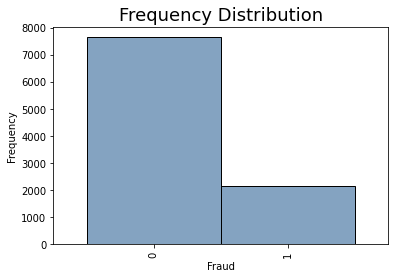

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

for col in df.columns:
    if 'FLAG' in col:
        temp = df[col].value_counts()
        temp2 = temp.head(10)
        if len(temp) > 10:
            temp2['remaining {0} items'.format(len(temp) - 10)] = sum(temp[10:])
        plt.title('Frequency Distribution', fontsize=18)
        plt.xlabel('Fraud', fontsize=10)
        plt.ylabel('Frequency', fontsize=10)
        temp2.plot(kind='bar',color=(0.2, 0.4, 0.6, 0.6), edgecolor='black', width=1.0)

In [8]:
columns = df.columns
columns

Index(['Unnamed: 0', 'Index', 'Address', 'FLAG', 'Avg min between sent tnx',
       'Avg min between received tnx',
       'Time Diff between first and last (Mins)', 'Sent tnx', 'Received Tnx',
       'Number of Created Contracts', 'Unique Received From Addresses',
       'Unique Sent To Addresses', 'min value received', 'max value received ',
       'avg val received', 'min val sent', 'max val sent', 'avg val sent',
       'min value sent to contract', 'max val sent to contract',
       'avg value sent to contract',
       'total transactions (including tnx to create contract',
       'total Ether sent', 'total ether received',
       'total ether sent contracts', 'total ether balance',
       ' Total ERC20 tnxs', ' ERC20 total Ether received',
       ' ERC20 total ether sent', ' ERC20 total Ether sent contract',
       ' ERC20 uniq sent addr', ' ERC20 uniq rec addr',
       ' ERC20 uniq sent addr.1', ' ERC20 uniq rec contract addr',
       ' ERC20 avg time between sent tnx', ' ERC20 

In [9]:
df.describe

<bound method NDFrame.describe of       Unnamed: 0  Index                                     Address  FLAG  \
0              0      1  0x00009277775ac7d0d59eaad8fee3d10ac6c805e8     0   
1              1      2  0x0002b44ddb1476db43c868bd494422ee4c136fed     0   
2              2      3  0x0002bda54cb772d040f779e88eb453cac0daa244     0   
3              3      4  0x00038e6ba2fd5c09aedb96697c8d7b8fa6632e5e     0   
4              4      5  0x00062d1dd1afb6fb02540ddad9cdebfe568e0d89     0   
...          ...    ...                                         ...   ...   
9836        9836   2175  0xff481ca14e6c16b79fc8ab299b4d2387ec8ecdd2     1   
9837        9837   2176  0xff718805bb9199ebf024ab6acd333e603ad77c85     1   
9838        9838   2177  0xff8e6af02d41a576a0c82f7835535193e1a6bccc     1   
9839        9839   2178  0xffde23396d57e10abf58bd929bb1e856c7718218     1   
9840        9840   2179  0xd624d046edbdef805c5e4140dce5fb5ec1b39a3c     1   

      Avg min between sent tnx  Avg min b

In [10]:
# Identify is there is any duplicate data
dupedf = df[df.duplicated()]
display(len(dupedf))

0

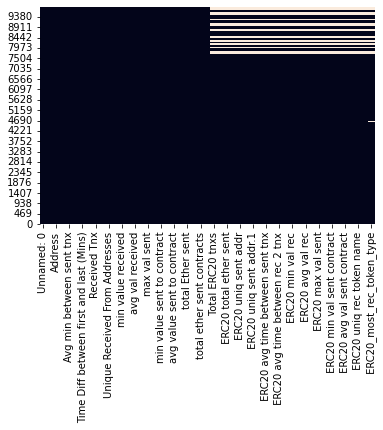

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(df.isnull(), cbar=False).invert_yaxis()
plt.show()

In [12]:
#Back Fill the null vallues
df = df.fillna(method='backfill')

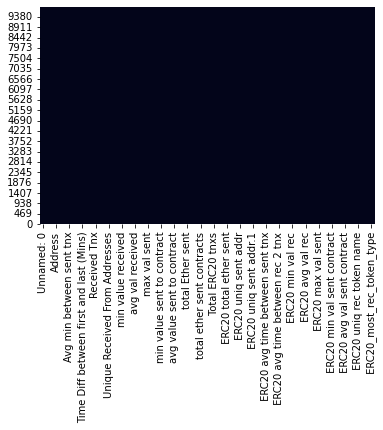

In [13]:
sns.heatmap(df.isnull(), cbar=False).invert_yaxis()
plt.show()

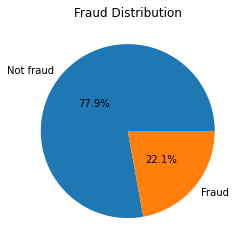

In [14]:
# Inspect target distribution
pie, ax = plt.subplots()
labels = ['Not fraud', 'Fraud']

plt.pie(x = df['FLAG'].value_counts(), autopct='%.1f%%', labels=labels, pctdistance=0.5)
plt.title('Fraud Distribution')
plt.show()

In [15]:
df.corr()[['FLAG']].sort_values(by='FLAG', ascending=False)

,FLAG
FLAG,1.000000
Unnamed: 0,0.719153
ERC20 total Ether sent contract,0.024728
ERC20 avg val rec,0.019456
ERC20 min val sent,0.019252
ERC20 max val sent,0.018862
ERC20 avg val sent,0.018841
ERC20 total ether sent,0.018536
ERC20 min val rec,0.010329
min val sent,0.006626


In [16]:
df = df.drop(['Unnamed: 0', 'Index'], axis=1)

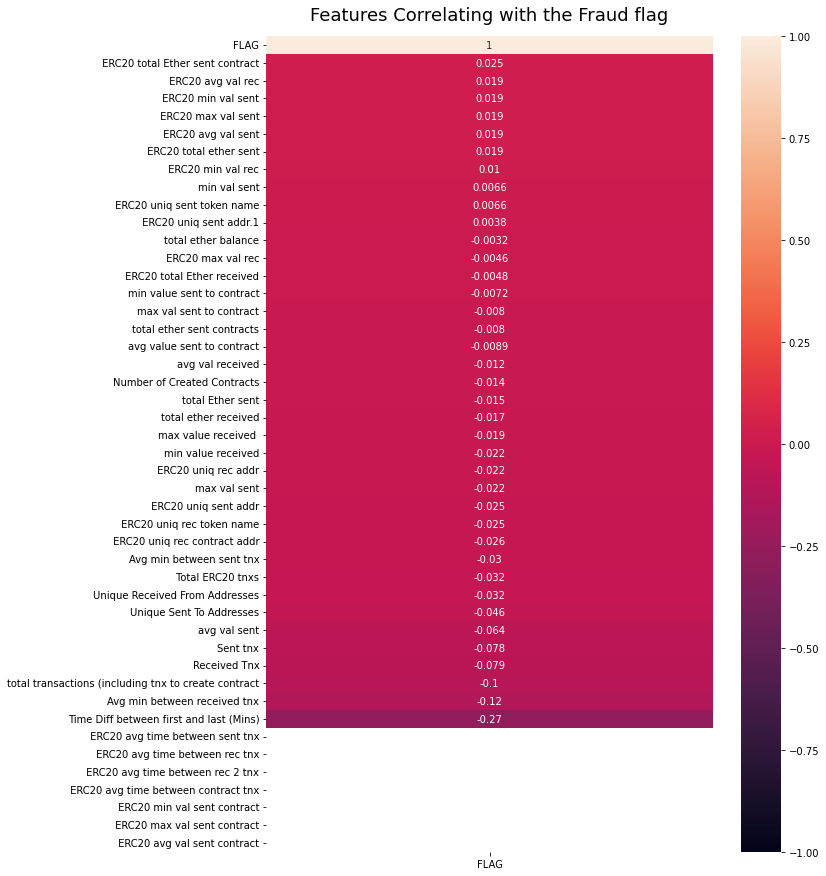

In [17]:
plt.figure(figsize=(10, 15))
heatmap = sns.heatmap(df.corr(method='pearson')[['FLAG']].sort_values(by='FLAG', ascending=False), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Features Correlating with the Fraud flag', fontdict={'fontsize':18}, pad=16);

In [18]:
# https://towardsdatascience.com/walking-through-a-linear-regression-dca9942111e4

In [19]:
# Split into Depended and independent variables
x = df.drop(columns='FLAG', axis = 1)
y = df.FLAG

In [20]:
#Split into training and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = .30, random_state = 33)

In [21]:
#Remove Duplicate and Missing Values
X_train.drop_duplicates(inplace = True)
X_train.dropna(inplace = True)

X_test.drop_duplicates(inplace = True)
X_test.dropna(inplace = True)

In [22]:
#Split out into just numeric data
X_train_numeric = X_train.select_dtypes(exclude = ['object'])

X_test_numeric = X_test.select_dtypes(exclude = ['object'])

#Went off a bit here
X_train_cols = X_train_numeric.columns
X_train_numeric.columns = X_train_cols

X_test_cols = X_test_numeric.columns
X_test_numeric.columns = X_test_cols

In [23]:
X_train_numeric.head()

,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,max value received,...,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name
5177,16.04,0.00,48.13,3,1,0,1,3,101.000000,101.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2721,0.00,76456.49,305832.32,1,4,0,4,1,0.007557,0.172528,...,329.580848,37.204014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0
5311,0.00,1565.86,192600.78,0,123,1,3,0,0.000000,1.333481,...,1.206181,0.977657,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
7054,2698.64,69243.04,373201.62,10,5,0,4,8,0.995000,2.994000,...,16888.000000,1187.868820,0.0,99.0,49.5,0.0,0.0,0.0,2.0,16.0
5219,157.38,0.00,314.77,2,1,0,1,2,101.000000,101.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
X_test_numeric.head()

,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,max value received,...,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name
7330,1.46,0.97,6.32,3,2,0,2,3,368.876276,1632.123724,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
347,155.42,0.00,310.83,2,1,0,1,2,101.000000,101.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
463,87627.86,13990.94,332838.28,3,5,0,1,1,0.990000,1.130000,...,322.471720,72.700296,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
3574,162.63,0.00,325.27,2,1,0,1,2,101.000000,101.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5286,0.00,1737.43,658487.70,0,379,1,7,0,0.000000,17.390056,...,0.904088,0.875592,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


In [25]:
#Scale Data

from sklearn.preprocessing import StandardScaler
from scipy import stats
ss = StandardScaler()

X_train_numeric = pd.DataFrame(ss.fit_transform(X_train_numeric))
X_train_numeric.set_index(X_train.index, inplace = True)
X_train_numeric.columns = X_train_cols
X_train_numeric.head()


,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,max value received,...,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name
5177,-0.236113,-0.355650,-0.671943,-0.147127,-0.170684,-0.027840,-0.099724,-0.085742,0.178746,-0.034670,...,-0.043239,-0.026376,-0.012673,-0.012602,-0.012206,0.0,0.0,0.0,-0.196694,-0.276054
2721,-0.236846,2.993061,0.275229,-0.149712,-0.167482,-0.027840,-0.089215,-0.093205,-0.133345,-0.041228,...,-0.043238,-0.026375,-0.012673,-0.012602,-0.012206,0.0,0.0,0.0,-0.196694,0.240253
5311,-0.236846,-0.287067,-0.075508,-0.151004,-0.040483,-0.021154,-0.092718,-0.096936,-0.133368,-0.041152,...,-0.043239,-0.026376,-0.012673,-0.012602,-0.012206,0.0,0.0,0.0,-0.196694,-0.161319
7054,-0.113550,2.677120,0.483906,-0.138080,-0.166415,-0.027840,-0.089215,-0.067086,-0.130293,-0.041044,...,-0.043203,-0.026370,-0.012673,-0.012602,-0.012206,0.0,0.0,0.0,0.074433,0.641825
5219,-0.229656,-0.355650,-0.671117,-0.148419,-0.170684,-0.027840,-0.099724,-0.089474,0.178746,-0.034670,...,-0.043239,-0.026376,-0.012673,-0.012602,-0.012206,0.0,0.0,0.0,-0.196694,-0.276054


In [26]:
X_test_numeric = pd.DataFrame(ss.fit_transform(X_test_numeric))
X_test_numeric.set_index(X_test.index, inplace = True)
X_test_numeric.columns = X_test_cols
X_test_numeric.head()

,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,max value received,...,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name
7330,-0.237160,-0.327305,-0.687046,-0.154832,-0.177442,-0.022636,-0.093241,-0.088918,0.976187,0.377016,...,-0.019045,-0.023062,-0.038192,-0.062494,-0.030205,0.0,0.0,0.0,-0.214279,-0.345888
347,-0.229671,-0.327346,-0.686104,-0.156223,-0.178493,-0.022636,-0.096293,-0.092850,0.168358,-0.045403,...,-0.019045,-0.023062,-0.038192,-0.062494,-0.030205,0.0,0.0,0.0,-0.214279,-0.345888
463,4.024993,0.263526,0.342964,-0.154832,-0.174288,-0.022636,-0.096293,-0.096783,-0.133240,-0.072956,...,-0.019045,-0.023062,-0.038192,-0.062494,-0.030205,0.0,0.0,0.0,-0.214279,0.033178
3574,-0.229320,-0.327346,-0.686059,-0.156223,-0.178493,-0.022636,-0.096293,-0.092850,0.168358,-0.045403,...,-0.019045,-0.023062,-0.038192,-0.062494,-0.030205,0.0,0.0,0.0,-0.214279,-0.345888
5286,-0.237231,-0.253970,1.350747,-0.159006,0.218843,-0.014354,-0.077984,-0.100715,-0.136225,-0.068470,...,-0.019045,-0.023062,-0.038192,-0.062494,-0.030205,0.0,0.0,0.0,-0.214279,-0.194262


In [27]:
#Isolate new categorical data
X_train_cat = X_train.select_dtypes(include = 'object')
X_test_cat = X_test.select_dtypes(include = 'object')

In [28]:
X_test_cat.head()

,Address,ERC20 most sent token type,ERC20_most_rec_token_type
7330,0xc51f248314af8b71e1d9e719287a721f0a3a03a2,0,0
347,0x078a0cd7abae97c1f346854e04ca4c2a7feeab7f,0,0
463,0x0ab8dd437d135c931c0003aea360e8679e870c56,None,XENON
3574,0x5ee19beea5ba1e95c73bce6f0cf09492539348b0,0,0
5286,0x8c5bf498f99f93a4b11a4f451660e81dc795e4d7,None,OmiseGO


In [29]:
obj_df = X_train_cat
obj_df[obj_df.isnull().any(axis=1)]
obj_df.head()

obj_df_test = X_test_cat
obj_df_test[obj_df_test.isnull().any(axis=1)]
obj_df.head()

,Address,ERC20 most sent token type,ERC20_most_rec_token_type
5177,0x894cd4c1c22b133d39e2b7355ea22fd46f45e448,0,0
2721,0x47311af6f03d8ece3a9ef2759225bd2f3e734cb1,None,Aragon
5311,0x8d01c8f9b34ce76e0327729adff3a8fd6ed65224,None,OmiseGO
7054,0xbcf9e0049dad4352d244638166c93c1ef089a111,Bancor,Crypto.com
5219,0x8a5f05d78f7944fb9914fab6515683d47d5085a2,0,0


In [30]:
#https://pbpython.com/categorical-encoding.html
#Convert to cat codes

obj_df = obj_df.astype('category')
obj_df.dtypes

Address                        category
 ERC20 most sent token type    category
 ERC20_most_rec_token_type     category
dtype: object

In [31]:
obj_df_test = obj_df_test.astype('category')
obj_df_test.dtypes

Address                        category
 ERC20 most sent token type    category
 ERC20_most_rec_token_type     category
dtype: object

In [32]:
#Convert to cteogry codes
for col in obj_df_test.columns:
    obj_df_test[col] = obj_df_test[col].cat.codes

obj_df_test.head()

,Address,ERC20 most sent token type,ERC20_most_rec_token_type
7330,2710,3,3
347,123,3,3
463,166,86,228
3574,1347,3,3
5286,1952,86,159


In [33]:
#Convert to cteogry codes
for col in obj_df.columns:
    obj_df[col] = obj_df[col].cat.codes

obj_df.head()

,Address,ERC20 most sent token type,ERC20_most_rec_token_type
5177,4436,3,2
2721,2330,154,23
5311,4557,154,253
7054,6058,31,95
5219,4475,3,2


In [34]:
#Merge prepped data
X_train_prep = pd.merge(obj_df, X_train_numeric, left_index = True, right_index = True)

X_test_prep = pd.merge(obj_df_test, X_test_numeric, left_index = True, right_index = True)


In [35]:
X_train_prep.head()

,Address,ERC20 most sent token type,ERC20_most_rec_token_type,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,...,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name
5177,4436,3,2,-0.236113,-0.355650,-0.671943,-0.147127,-0.170684,-0.027840,-0.099724,...,-0.043239,-0.026376,-0.012673,-0.012602,-0.012206,0.0,0.0,0.0,-0.196694,-0.276054
2721,2330,154,23,-0.236846,2.993061,0.275229,-0.149712,-0.167482,-0.027840,-0.089215,...,-0.043238,-0.026375,-0.012673,-0.012602,-0.012206,0.0,0.0,0.0,-0.196694,0.240253
5311,4557,154,253,-0.236846,-0.287067,-0.075508,-0.151004,-0.040483,-0.021154,-0.092718,...,-0.043239,-0.026376,-0.012673,-0.012602,-0.012206,0.0,0.0,0.0,-0.196694,-0.161319
7054,6058,31,95,-0.113550,2.677120,0.483906,-0.138080,-0.166415,-0.027840,-0.089215,...,-0.043203,-0.026370,-0.012673,-0.012602,-0.012206,0.0,0.0,0.0,0.074433,0.641825
5219,4475,3,2,-0.229656,-0.355650,-0.671117,-0.148419,-0.170684,-0.027840,-0.099724,...,-0.043239,-0.026376,-0.012673,-0.012602,-0.012206,0.0,0.0,0.0,-0.196694,-0.276054


In [36]:
#Set y train
y_train = y_train.loc[X_train_prep.index]
y_train.head()

#Set y test
y_test = y_test.loc[X_test_prep.index]
y_test.head()

7330    0
347     0
463     0
3574    0
5286    0
Name: FLAG, dtype: int64

In [37]:
#Train the model
import numpy as np
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_prep, y_train)

LinearRegression()

In [38]:
#Test the model
r_sq = model.score(X_test_prep, y_test)

In [39]:
#Building the model using prepared data

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train_prep, y_train)

y_hat_train = lr.predict(X_train_prep)
y_hat_test = lr.predict(X_test_prep)


In [40]:
# Model Performance
from sklearn.metrics import r2_score, mean_squared_error

from sklearn.metrics import accuracy_score

print('--- Training Data ---')
print(f"r^2: {r2_score(y_train, y_hat_train)}")
print(f"rmse: {np.sqrt(mean_squared_error(y_train, y_hat_train))}")
print('--- Test Data ---')
print(f"r^2: {r2_score(y_test, y_hat_test)}")
print(f"rmse: {np.sqrt(mean_squared_error(y_test, y_hat_test))}")

--- Training Data ---
r^2: 0.2873287171409573
rmse: 0.3530243267417083
--- Test Data ---
r^2: -1309190546618121.2
rmse: 14785325.897153175


In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier

In [42]:
models = {'Decision Tree' : DecisionTreeClassifier(), 'Random Forest' : RandomForestClassifier(), 'Neural Network' : MLPClassifier(),'K-Neighbors': KNeighborsClassifier(),'Linear Regression': LinearRegression(),
}


for name, model in models.items():
    model = model.fit(X_train_prep,y_train)

In [43]:
from sklearn import tree

forest = RandomForestClassifier(random_state=0)
forest.fit(X_train_prep,y_train)

RandomForestClassifier(random_state=0)

In [44]:
import time
import numpy as np

start_time = time.time()
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.005 seconds


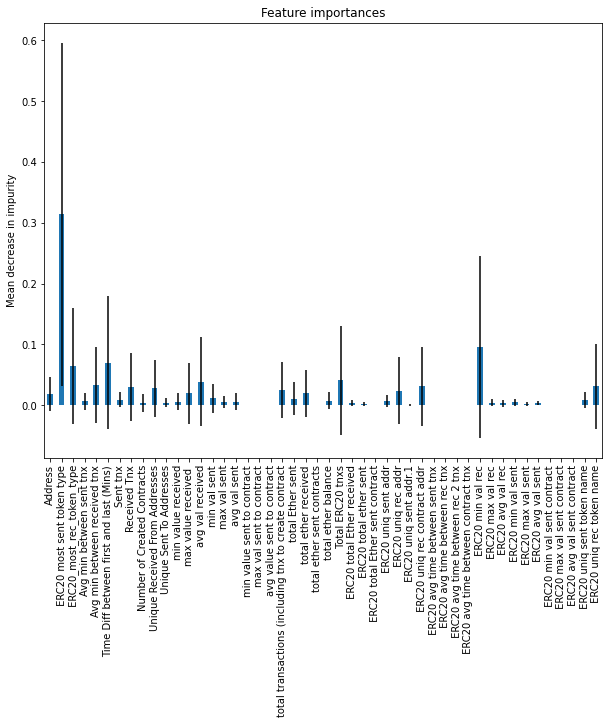

In [45]:
import pandas as pd

forest_importances = pd.Series(importances, index=list(X_train_prep.columns.values))

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances")
ax.set_ylabel("Mean decrease in impurity")
fig.set_figheight(8)
fig.set_figwidth(10)

In [46]:
from sklearn.inspection import permutation_importance

start_time = time.time()
result = permutation_importance(
    forest, X_test_prep, y_test, n_repeats=10, random_state=42, n_jobs=2
)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

forest_importances = pd.Series(result.importances_mean, index=list(X_train_prep.columns.values))

Elapsed time to compute the importances: 4.571 seconds


In [51]:
for name, model in models.items():
    print(name)
    print(model.score(X_test_prep, y_test) * 100)

Decision Tree
61.52542372881356
Random Forest
84.88135593220339
Neural Network
96.33898305084746
K-Neighbors
86.91525423728812
Linear Regression
-1.3091905466181213e+17


In [52]:
for name, model in models.items():    
    print(name)
    print(model.score(X_train_prep, y_train))


Decision Tree
1.0
Random Forest
1.0
Neural Network
0.9733972961186219
K-Neighbors
0.9715074865532781
Linear Regression
0.2873287171409573


In [54]:
for name, model in models.items():    
    print(name)
    print(model.score(X_test_prep, y_test))



Decision Tree
0.6152542372881356
Random Forest
0.848813559322034
Neural Network
0.9633898305084746
K-Neighbors
0.8691525423728813
Linear Regression
-1309190546618121.2


In [56]:
for name, model in models.items():
    print(name)
    print(model.score(X_train_prep, y_train) * 100)

Decision Tree
100.0
Random Forest
100.0
Neural Network
97.3397296118622
K-Neighbors
97.15074865532782
Linear Regression
28.73287171409573
